Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
SPDX-License-Identifier: Apache-2.0

# Similarity Algorithms

Graph similarity algorithms allow you to compare and analyze the similarities and dissimilarities between different graph structures, which can provide insight into relationships, patterns, and commonalities across diverse datasets. This is invaluable in various fields, such as biology, for comparing molecular structures, such as social networks, for identifying similar communities, and such as recommendation systems, for suggesting similar items based on user preferences.

## Supported Algorithms

Neptune Analytics supports the following similarity algorithms, each of which has a few variants:

* [Common Neighbors](#Common-Neighbors) -  This algorithm counts the number of common neighbors of two input vertices, which is the intersection of the neighborhoods of those vertices.
* [Total Neighbors](#Total-Neighbors) -  This algorithm counts the number of total unique neighbors among two input vertices, which is the union of the neighborhoods of those vertices.
* [Jaccard Similarity](#Jaccard-Similarity) -   This algorithm measures the similarity between two sets by dividing the size of their intersection by the size of their union.
* [Overlap Similarity](#Overlap-Similarity) -   This algorithm measures the overlap between the neighbors of two vertices.

    
## Loading Data
The first step in most projects is to load data to use for analysis.  For demonstration purposes, we have provided a set of datasets that can be used to demonstrate the features and functionality of Neptune Analytics. 

The cell below makes it easy to load the `air-routes` data into your graph.  The `air-routes` dataset we will be loading in this notebook is supplied as part of the [Practical Gremlin](https://kelvinlawrence.net/book/Gremlin-Graph-Guide.html#air) book.

The `air-route` graph contains several vertex types that are specified using labels. The most common ones being `airport` and `country`. There are also nodes for each of the seven continents (`continent`) and a single `version` vertex that I provided as a way to test which version of the graph you are using.

Routes between airports are modeled as edges. These edges carry the `route` label and include the distance between the two connected airport vertices as a property called `dist`. Connections between countries and airports are modelled using an edge with a `contains` label.

Each `airport` vertex has many properties associated with it giving various details about that airport including its IATA and ICAO codes, its description, the city it is in and its geographic location.

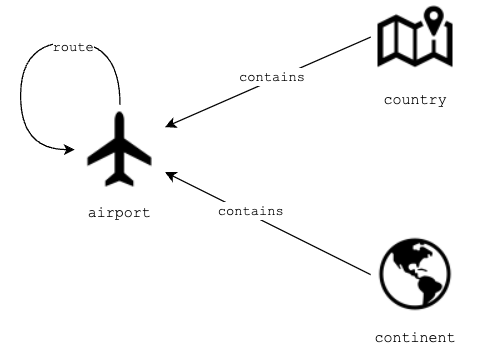

To load this dataset, run the two cells below.  This first cell will setup a few python variables using the configuration parameters of this Neptune Notebook.  The second cell will use Neptune Analytics batch load feature to load the data from the provided S3 bucket.  

**Note:** You only need to do this once. If you have already loaded the data previously you do not need to load it again.

In [ ]:
import graph_notebook as gn
config = gn.configuration.get_config.get_config()

s3_bucket = f"s3://aws-neptune-customer-samples-{config.aws_region}/sample-datasets/gremlin/air-routes/"
region = config.aws_region

In [ ]:
%%oc 

CALL neptune.load({format: "csv", 
                   source: "${s3_bucket}", 
                   region : "${region}"})

## Common Neighbors

Common neighbors is an algorithm that counts the number of common neighbors of two input nodes, which is the intersection of their neighborhoods. This provides a measure of their potential interaction or similarity within the network.


A few common uses of the common neighbors algorithm:

- Link prediction in networks: The common neighbors algorithm is often used to predict missing or potential links between nodes in a network based on the number of common neighbors they share. A higher number of common neighbors indicates a higher likelihood of a link existing.

- Recommendation systems: It can be used to recommend new connections, friends, or items to users based on the items/friends their existing connections have in common. More common neighbors means more relevant recommendations. 

- Social network analysis: Analyzing the common neighbor relationships helps understand how densely different parts of a social network are connected and how information might spread through the network.

- Biological network analysis: In protein-protein interaction or gene regulatory networks, common neighbor analysis provides clues about functionally linked or jointly involved proteins/genes.

Common Neighbors is commonly used for link prediction, recommendations, and analyzing topological properties in various complex networks.

By counting how many neighboring nodes are shared by two nodes, it provides a measure of their potential interaction or similarity within the network. It's used in social network analysis to identify individuals with mutual connections, in citation networks to find influential papers referenced by multiple sources, and in transportation networks to locate critical hubs with many direct connections to other nodes.

Using our air routes data, let's find the number of common neighbors between the Seattle and Anchorage airports.

In [ ]:
%%oc
MATCH (seattle:airport {code: 'SEA'})
MATCH (anchorage:airport {code: 'ANC'})
CALL neptune.algo.neighbors.common( seattle, anchorage)
YIELD common
RETURN seattle.code, anchorage.code, common

## Total Neighbors
Total neighbors is an algorithm that counts the total number of unique neighbors of two input vertices, which is the union of the neighborhoods of those vertices.

Some potential uses of the total neighbors algorithm:

- Social network analysis - It can be used to analyze the connectivity and structure of social networks by counting the total number of connections (neighbors) each node has. This provides insights into things like influence, centrality, and community detection.

- Epidemiology modeling - In epidemiology, the total neighbors algorithm can help model how diseases or information spread through a population based on the number of contacts each individual has. More connected two individuals the more likely they are to spread disease.

- Citation analysis - In academic networks, it can measure the influence of authors, papers, or journals based on the total number of citations or references they receive from others. Highly cited works may be more influential. 

- Fraud detection - On networks like financial transactions, unusual spikes in the number of connections a node makes over time could indicate suspicious or fraudulent activity.

Applications that needs to analyze connectivity, influence, spread, or centrality within network structures care candidates for using the total neighbors algorithm.

Using our air routes data, let's find the number of total neighbors between the Seattle and Anchorage airports.

In [ ]:
%%oc
MATCH (seattle:airport {code: 'SEA'})
MATCH (anchorage:airport {code: 'ANC'})
CALL neptune.algo.neighbors.total( seattle, anchorage)
YIELD total
RETURN seattle.code, anchorage.code, total

## Jaccard Similarity
Jaccard similarity measures the similarity between two sets. It is calculated by dividing the size of the intersection of the two sets by the size of their union.

By measuring the proportion of shared neighbors relative to the total number of unique neighbors, this algorithm provides a metric for the degree of overlap or commonality between different parts of a network. 

Some potential uses of the Jacquard similarity algorithm:

- Recommendation systems - It can be used to find similar items, products, content, etc. based on attributes and build recommendations. For example, recommending similar movies, products, articles etc.

- Clustering and categorization - The algorithm can group similar entities together based on their attributes. This can be used for automatic categorization, clustering of data, images etc. 

- Duplicate detection - It can identify duplicate or near-duplicate records, files, images etc. by comparing their attributes and finding high similarity scores. This is useful for deduplication in an identity graph.

- Fraud detection - Similar techniques can be used to detect fraudulent or anomalous transactions, customers, activities etc. by finding outliers or entities that are dissimilar to others. 

Applications needing to find or group similar entities based on their attributes are a good candidate for Jaccard similarity.

Using our air routes data, let's find the Jaccard similarity between the Seattle and Anchorage airports.

In [ ]:
%%oc
MATCH (seattle:airport {code: 'SEA'})
MATCH (anchorage:airport {code: 'ANC'})
CALL neptune.algo.jaccardSimilarity( seattle, anchorage)
YIELD score
RETURN seattle.code, anchorage.code, score

## Overlap Similarity

Overlap Similarity measures the overlap between the neighbors of two nodes. It does this by dividing the intersection of the two neighborhoods by the neighbor with minimum degree.

By calculating the ratio of common neighbors shared by two nodes to the total number of neighbors they collectively have, it provides a measure of their closeness or similarity within the network.

 Here are some potential uses of the Overlap similarity graph algorithm:

- Recommendation systems - Find similar items/products based on the features/attributes they have in common. Items with higher feature overlap can be recommended together. 

- Social network analysis - Identify communities or groups within a social network based on the connections people share. People who share more friends/connections will be clustered together.

- Protein-protein interaction networks - Map the interactions between proteins based on the other proteins they both interact with. Proteins with more interaction partners in common are more closely related.

- Citation networks - Cluster academic papers or patents based on the other papers/patents they both cite. Higher citation overlap indicates related topics.

- Fraud detection - Identify potential fraudsters based on commonalities in their transactions, accounts used, locations accessed etc. Higher attribute overlap raises suspicion. 

- Duplicate detection - Find duplicate records in databases by comparing the overlapping fields/attributes between records. More overlap means higher chance of being a duplicate.

- Collaborative filtering - Recommend items to users based on item attributes that overlap between what different users have liked in the past.

So in summary, any application where identifying similar or related entities based on shared/overlapping attributes can benefit from the Overlap similarity graph algorithm.

In [ ]:
%%oc
MATCH (seattle:airport {code: 'SEA'})
MATCH (anchorage:airport {code: 'ANC'})
CALL neptune.algo.overlapSimilarity( seattle, anchorage)
YIELD score
RETURN seattle.code, anchorage.code, score

## Next Steps
In this notebook, we have demonstrated how to use the similarity algorithms provided by Neptune Analytics.  If you are interested in the other types of algorithms offered please look at the other notebooks available:

* [Path finding algorithms](./02-Path-Finding-Algorithms.ipynb)

* [Centrality algorithms](./03-Centrality-Algorithms.ipynb)

* [Community Detection algorithms](./04-Community-Detection-Algorithms.ipynb)